## Predicting car prices using k-nearest neighbors 

We will predict a car's market price using its attributes with the help of k-nearest neighbors algorithm. 

You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 

In [1]:
import pandas as pd
cars = pd.read_csv('imports-85.data')

In [2]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
#number of rows and columns
cars.shape

(204, 26)

In [4]:
# Set column names because the data has no heading
column_names = ['symboling', 'normalized_losses','make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names = column_names)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
import numpy as np

In [6]:
#replace every '?' with 'nan'
cars.replace('?', np.nan, inplace = True)

In [7]:
# select numeric columns
numeric_columns = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
df = cars[numeric_columns]

In [8]:
# We get the data type of the columns
df.dtypes

normalized_losses     object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [9]:
#Convert data to float type
df = df.astype('float');

In [10]:
# Count missing data
df.isna().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Drop the 'normalized_losses' column entirely because is missing 41 values of 204 --> 20%

In [11]:
df = df.drop('normalized_losses', axis=1)

We have 4 rows with empty 'prices', we'll remove these rows

In [12]:
df = df.dropna(subset=['price'])

In [13]:
# Count missing data
df.isna().sum()

wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [14]:
# Check the number of nan in rows
df.isnull().sum(axis=1).tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [15]:
#replace nan with average value of that columns
df = df.fillna(df.mean())

In [16]:
df.isna().sum()

wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [17]:
#check if there are nan values
df.isna().sum()

wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Normalize data (between 0 a 1)

In [18]:
prices = df['price']
data = (df - df.min()) /(df.max() - df.min())
data['price'] = prices

In [19]:
data.head()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### 1. Simple k-nearest neighbors models evaluation using one feature and the default k value

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [21]:
# function that encapsulates the training and simple validation process 
def knn_train_test(training_column, target_column, data):
           
    #Shuffle data
    np.random.seed(1)
    shuffled_index = np.random.permutation(data.index)
    data = data.reindex(shuffled_index)
    
    #separate data to training and testing data
    half = int(len(data)/2)
    training = data.iloc[0:half]
    testing = data.iloc[half:]
    
    # model  
    model = KNeighborsRegressor()
    
    #fit the model
    model.fit(training[[training_column]], training[target_column])
    
    # prediction
    prediction = model.predict(testing[[training_column]])
    
    #calculate error: RMSE
    mse = mean_squared_error(testing[target_column], prediction)
    rmse = np.sqrt(mse)
    return rmse

In [22]:
# select numeric columns
columns = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
evaluation_columns = {}

for column in columns:
    rmse = knn_train_test(column, 'price', data)
    evaluation_columns[column] = rmse

analysis = pd.Series(evaluation_columns)
analysis.sort_values()

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

The feature with the lowest RMSE is  'engine_size'

### 2. Which feature will perform the best using the k values: 1, 3, 5, 7 and 9?

In [23]:
# function that encapsulates the training and simple validation process 
def knn_train_test1(training_column, target_column, data , k_list):
    rmse_values = list()
    
    #Shuffle data
    np.random.seed(1)
    shuffled_index = np.random.permutation(data.index)
    data = data.reindex(shuffled_index)
    
    #separate data to training and testing data
    half = int(len(data)/2)
    training = data.iloc[0:half]
    testing = data.iloc[half:]
    
    for k in k_list:
        model = KNeighborsRegressor(n_neighbors= k)
        
        #fit the model
        model.fit(training[[training_column]], training[target_column])
    
        # prediction
        prediction = model.predict(testing[[training_column]])
    
        #calculate error: RMSE
        mse = mean_squared_error(testing[target_column], prediction)
        rmse = np.sqrt(mse)
        rmse_values.append(rmse)
    return rmse_values

In [24]:
# select numeric columns
columns = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
k_values = [1, 3, 5 ,7 ,9]
evaluation_columns = {}
for column in columns:
    rmse = knn_train_test1(column, 'price', data, k_values)
    evaluation_columns[column] = rmse

results = pd.DataFrame(evaluation_columns) 
results['k_value'] = k_values
results.head()

,bore,city_mpg,compression_ratio,curb_weight,engine_size,height,highway_mpg,horsepower,length,peak_rpm,stroke,wheel_base,width,k_value
0,8602.588485,5901.143574,8087.205347,5264.290231,3258.486106,8904.046456,6025.594967,4170.054848,4628.455501,9511.480068,9116.495955,4493.734069,4559.257298,1
1,6984.239489,4646.746409,7375.063686,5022.318012,2840.562806,8277.609643,4617.305020,4020.849263,5129.835821,8537.550900,7338.684670,5120.161506,4606.413692,3
2,6780.627785,4766.422505,6610.812153,4401.118255,3238.462830,8144.441043,4630.026799,4037.037713,5427.200961,7697.459696,8006.529545,5461.553998,4704.482590,5
3,6878.097966,5232.523034,6732.801283,4330.608104,3563.086774,7679.598124,4796.061440,4353.811860,5313.427721,7510.294160,7803.937797,5448.107051,4571.485046,7
4,6866.808502,5465.209493,7024.485525,4632.044474,3831.824415,7811.036063,5278.358057,4515.135617,5383.054515,7340.041341,7735.554366,5738.405685,4652.914172,9


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

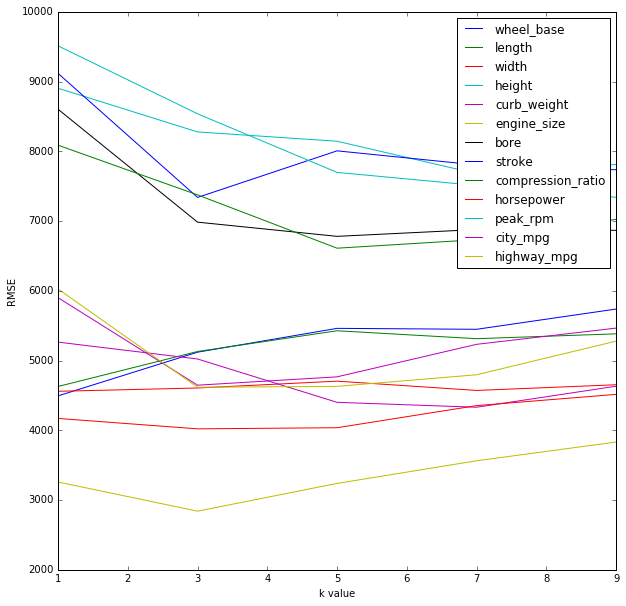

In [26]:
plt.figure(figsize = [10,10])
plt.plot(results['k_value'], results[columns])
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(columns, loc = 'upper right')
plt.show()

In this case, the best choice is 'engine_size' with the lower RMSE with k = 3

In [27]:
# Which are the average RMSE of each feature?
results[columns].mean().sort_values()

engine_size          3346.484586
horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64

We select the features with the best RMSE for the next analysis.

In [28]:
features_selected = ['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg']

### 3. Function knn_train_test() now accept a list of columns names

In [29]:
# function that encapsulates the training and simple validation process 
def knn_train_test2(training_columns, target_column, data):   
    model = KNeighborsRegressor()
       
    #Shuffle data
    np.random.seed(1)
    shuffled_index = np.random.permutation(data.index)
    data = data.reindex(shuffled_index)
    
    #separate data to training and testing data
    half = int(len(data)/2)
    training = data.iloc[0:half]
    testing = data.iloc[half:]
    
    #fit the model
    model.fit(training[training_columns], training[target_column])
    
    # prediction
    prediction = model.predict(testing[training_columns])
    
    #calculate error: RMSE
    mse = mean_squared_error(testing[target_column], prediction)
    rmse = np.sqrt(mse)
    return rmse

In [30]:
evaluation = []

for num_features in range(2,6):
    rmse = knn_train_test2(features_selected[:num_features], 'price', data)
    evaluation.append(rmse)

evaluation

[2949.8817277180374, 3580.7376651928435, 3487.340917327035, 3410.2170133901805]

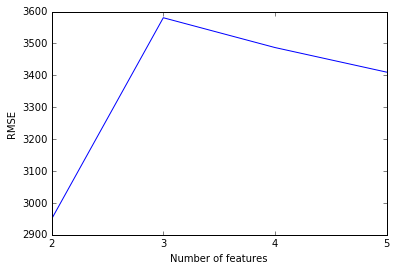

In [31]:
features = [2,3,4,5] 
plt.plot(features, evaluation)
plt.xticks(np.arange(min(features), max(features)+1, 1.0))
plt.xlabel('Number of features')
plt.ylabel('RMSE')

In this case the best choice is select the 2 features, beacause the error is minimize.

### 4. Function knn_train_test() now accept a list of columns names and vary k to 1 to 25

In [32]:
# function that encapsulates the training and simple validation process 
def knn_train_test3(training_columns, target_column, data , k_list):
    rmse_values = list()
        
    #Shuffle data
    np.random.seed(1)
    shuffled_index = np.random.permutation(data.index)
    data = data.reindex(shuffled_index)
    
    #separate data to training and testing data
    half = int(len(data)/2)
    training = data.iloc[0:half]
    testing = data.iloc[half:]
    
    for k in k_list:
        model = KNeighborsRegressor(n_neighbors= k)
        #fit the model
        model.fit(training[training_columns], training[target_column])
    
        # prediction
        prediction = model.predict(testing[training_columns])
    
        #calculate error: RMSE
        mse = mean_squared_error(testing[target_column], prediction)
        rmse = np.sqrt(mse)
        rmse_values.append(rmse)
    return rmse_values

In [33]:
# select numeric columns
evaluation_columns = {}

for num_features in range(2,6):
    rmse = knn_train_test3(features_selected[:num_features], 'price', data, list(range(1,26,1)))
    evaluation_columns[str(num_features)+ '_features'] = rmse

results = pd.DataFrame(evaluation_columns) 
results['k_value'] = range(1,26)
results

,2_features,3_features,4_features,5_features,k_value
0,2783.620424,3399.814810,2952.725687,2824.706123,1
1,2657.796381,3497.191103,3131.704953,2915.673165,2
2,2792.586573,3333.696658,3129.692822,3012.420455,3
3,2891.532969,3355.884229,3241.432078,3202.887605,4
4,2949.881728,3580.737665,3487.340917,3410.217013,5
5,3096.402602,3732.943017,3637.038147,3618.450943,6
6,3164.681969,3639.943941,3606.195078,3622.629021,7
7,3413.228359,3747.420913,3809.930703,3848.635836,8
8,3748.671660,3986.593913,3875.274902,3977.814914,9
9,4080.712506,4005.354889,3997.158306,3994.813221,10


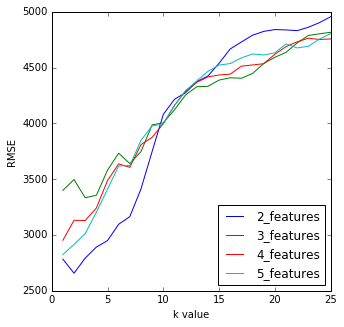

In [34]:
column_names = ["2_features", "3_features", "4_features", "5_features"]
plt.figure(figsize = [5,5])
plt.plot(results['k_value'], results[column_names])
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(column_names, loc = 'lower right')
plt.show()

In this case, with K=2 and 2 features we have the lowest RMSE

### 4. Using k-fold cross validation instead of test/train validation.

In this case, we will also look for what is the best combination of characteristics for each value of k

In [35]:
import itertools

# Combinations of features
def combination(values):
    output = []
    for i in range(1, len(values)+1):
        els = [list(x) for x in itertools.combinations(values, i)]
        output.extend(els)
    return output

In [36]:
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test4(training_columns, target_column, data):
    kf = KFold(10, shuffle = True, random_state = 1)
    output = {}
    
    for features in combination(training_columns):
        avg_rmse_list = []
        for k in range(1,11):
            knn = KNeighborsRegressor(n_neighbors= k)
            mses = cross_val_score(knn, data[features], data[target_column], scoring='neg_mean_squared_error', cv=kf)
            rmses = np.sqrt(np.absolute(mses))
            avg_rmse = np.mean(rmses)
            avg_rmse_list.append(avg_rmse)
        output[str(features)] = avg_rmse_list
    return output

columns = ['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg', 'length', 'city_mpg']

results = knn_train_test4(columns, 'price', data)

In [37]:
results_data = pd.DataFrame(results) 
results_data['k_value'] = range(1,11)
results_data

,['city_mpg'],"['curb_weight', 'city_mpg']","['curb_weight', 'highway_mpg', 'city_mpg']","['curb_weight', 'highway_mpg', 'length', 'city_mpg']","['curb_weight', 'highway_mpg', 'length']","['curb_weight', 'highway_mpg']","['curb_weight', 'length', 'city_mpg']","['curb_weight', 'length']",['curb_weight'],"['engine_size', 'city_mpg']",...,"['width', 'curb_weight', 'length']","['width', 'curb_weight']","['width', 'highway_mpg', 'city_mpg']","['width', 'highway_mpg', 'length', 'city_mpg']","['width', 'highway_mpg', 'length']","['width', 'highway_mpg']","['width', 'length', 'city_mpg']","['width', 'length']",['width'],k_value
0,5756.990928,3959.524862,3656.295298,3004.756634,3214.594148,4102.408242,3194.479737,3617.109148,5157.859842,2963.022751,...,3806.260724,3755.657897,3463.455616,3561.088403,3647.825572,3453.392906,3425.333619,3528.388946,4066.868124,1
1,4854.588560,3736.993797,3503.836331,3105.069849,2929.094512,3661.469533,3035.403955,3777.981507,4416.793671,2852.731258,...,3789.338357,4007.491622,3433.858891,3713.839303,3598.229274,3595.228250,3578.423629,3922.219914,4007.136578,2
2,4388.057423,3356.524324,3234.377914,3104.240422,3315.538997,3875.597417,3238.343433,3600.565076,4495.974906,2919.068219,...,4090.634690,3898.568959,3668.605932,3704.647873,3897.554130,3880.935765,3784.123926,4367.828632,4014.256862,3
3,4315.773584,3329.263634,3384.660749,3168.345724,3411.435354,3854.332154,3307.863283,3763.569895,4378.143361,2956.697640,...,4122.347424,3891.481392,3749.797583,3752.757494,4206.332207,4037.385101,4168.038659,4725.150340,4114.142865,4
4,4305.536968,3469.961739,3541.259984,3475.092702,3727.158752,3923.987177,3539.185694,3969.632677,4234.188078,3056.801203,...,4101.094826,3959.157217,3716.476435,4000.528604,4075.228865,4005.779259,4178.976161,4808.137344,4209.420018,5
5,4308.506998,3487.820362,3604.191459,3696.736650,3927.519056,4018.261162,3562.325589,4027.855288,4101.923870,3141.372361,...,4091.953955,3916.116670,3797.446370,4193.008338,4139.755907,3975.139212,4354.768305,4939.331125,4324.087494,6
6,4247.140019,3476.003232,3735.446287,3696.873803,3944.880506,4012.270625,3621.498567,4083.590994,4065.269237,3120.900508,...,3990.875072,3850.782956,3838.023552,4235.405101,4204.647396,4056.936187,4399.911423,4899.356087,4362.409681,7
7,4388.710912,3543.684799,3748.679904,3836.549890,3970.829271,3963.476303,3769.264203,4102.251710,3972.001218,3206.206081,...,4063.522555,3867.559365,3914.391177,4246.371719,4305.411211,4121.559919,4351.942916,4887.500973,4330.876857,8
8,4414.995561,3624.972564,3794.112507,3919.049596,4124.095939,3875.724772,3808.823394,4061.679143,3961.532240,3214.877761,...,4053.201524,3859.359844,4031.962007,4228.592977,4301.926366,4074.373509,4351.040240,4895.957209,4316.124588,9
9,4366.236935,3674.238274,3775.142190,4013.651480,4188.543603,3860.821656,3971.732180,4168.791022,3854.423917,3252.050312,...,4067.245542,3861.727704,4113.545135,4244.116184,4304.016827,4090.120102,4331.064070,4924.161194,4314.494499,10


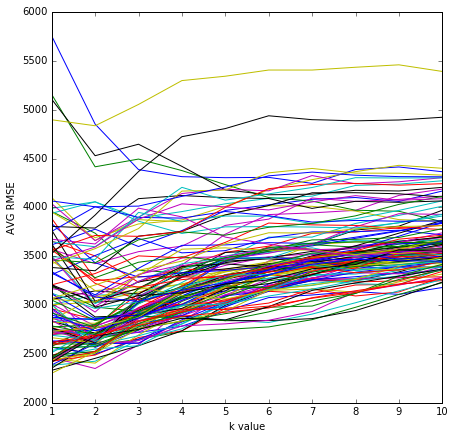

In [38]:
plt.figure(figsize = [7,7])
values = results_data.drop('k_value', axis =1)
plt.plot(results_data['k_value'], values)
plt.xlabel('k value')
plt.ylabel('AVG RMSE')
plt.show()

In [39]:
#initialize variables
combination = values.columns[0]
pos = values[combination].idxmin()  
minimum = values[combination].min()

for i in values.columns:
    if values[i].min() < minimum:
        pos = values[i].idxmin()  
        minimum = values[i].min() 
        combination = i

print(minimum, pos+1, combination)

2302.6146431917973 1 ['engine_size', 'width', 'curb_weight', 'highway_mpg']


### Conclusions

Finally, we can concluded that with the features ['engine_size', 'width', 'curb_weight', 'highway_mpg'] and with k = 1 we get the lowest average RMSE 2302.61 relative to the price.